In [16]:
import seaborn as sns   
import pandas as pd
import matplotlib.pyplot as plt
('pandas version',pd.__version__)

('pandas version', '2.2.2')

In [17]:
T1 = 'vct-intl.json'
T2 = 'vct-challengers.json'
df = pd.read_json(T1)
df.head(3)

,playerName,team,rating,region,playerStatistics,agent,playerCategory
0,Cryocells,100T,1.14,Americas,"{'average_combat_score': '230.1', 'kill_deaths...","[brimstone, astra, jett]",vct-international
1,zekken,SEN,1.13,Americas,"{'average_combat_score': '255.3', 'kill_deaths...","[raze, jett, neon]",vct-international
2,s0m,NRG,1.12,Americas,"{'average_combat_score': '224.7', 'kill_deaths...","[clove, omen, brimstone]",vct-international


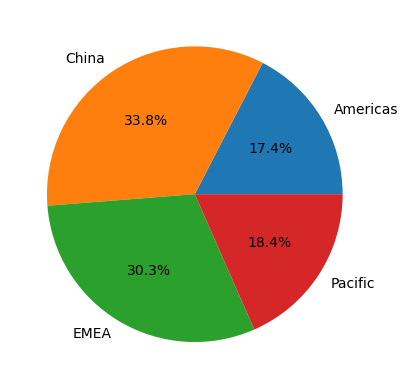

In [18]:
region = df.groupby(['region']).size()
region.plot(kind='pie',autopct='%1.1f%%')
plt.show()

SHOW WHICH TEAM HAS THE HIGHEST ACS

In [19]:
acs_list = []
for stats in df['playerStatistics']:
    acs_list.append(float(stats['average_combat_score']))
df['ACS'] = acs_list
#Everything above this makes a new column in the dataframe called ACS
team_avg_acs = df.groupby(['team', 'region'])['ACS'].mean().reset_index()   #Groups dataframe by team and region and for each group it takes the mean(Average) of the ACS column, .reset_index() turns the grouped index into a normal Dataframe again.
top5 = team_avg_acs.sort_values(by='ACS', ascending=False).head(5) #This sorts the grouped df by ACS, descending
for i, row in top5.iterrows():
    print(f"{row['team']} ({row['region']}) : {row['ACS']}") #This prints out the top 5 highest ACS teams in the whole thing


Toe (China) : 237.9
SEN (EMEA) : 233.2
EF (EMEA) : 216.25
LEV (Americas) : 208.2
M80 (Americas) : 206.4


In [20]:
df.head() #Here u can see the ACS column

,playerName,team,rating,region,playerStatistics,agent,playerCategory,ACS
0,Cryocells,100T,1.14,Americas,"{'average_combat_score': '230.1', 'kill_deaths...","[brimstone, astra, jett]",vct-international,230.1
1,zekken,SEN,1.13,Americas,"{'average_combat_score': '255.3', 'kill_deaths...","[raze, jett, neon]",vct-international,255.3
2,s0m,NRG,1.12,Americas,"{'average_combat_score': '224.7', 'kill_deaths...","[clove, omen, brimstone]",vct-international,224.7
3,eeiu,100T,1.11,Americas,"{'average_combat_score': '189.4', 'kill_deaths...","[fade, sova]",vct-international,189.4
4,TenZ,SEN,1.10,Americas,"{'average_combat_score': '212.2', 'kill_deaths...","[omen, gekko, kayo]",vct-international,212.2


BEST REGION
& 
REGIONAL BEST PLAYER

In [21]:
#Best Region
Regionals = df.groupby(['region'])['ACS'].mean().reset_index()  #Groups the dataframe by region and playerName, then takes the mean of all columns for each group, .reset_index() turns the grouped index into a normal Dataframe again.
Regionals['ACS'] = Regionals['ACS'].round(1)  #Rounds the ACS column to 1 decimal place
topfive = Regionals.sort_values(by='ACS', ascending=False)  #Sort
topfive.head()

,region,ACS
0,Americas,196.8
2,EMEA,194.0
3,Pacific,193.7
1,China,191.1


The competition being fierce to determine which is the region which is the "best" (According to ACS). 
The Americas take the lead with their ACS being 2.8 more than their European counterparts

Best players by ACS in the world

In [22]:
Regional_players = df.groupby(['region', 'playerName'])['ACS'].mean().reset_index()  #Groups the dataframe by region and playerName, then takes the mean of all columns for each group, .reset_index() turns the grouped index into a normal Dataframe again.
Regional_players['ACS'] = Regional_players['ACS'].round(1)  #Rounds the ACS column to 2 decimal place
topplayer = Regional_players.sort_values(by='ACS', ascending=False)
topplayer.head(20)  #This shows the top 5 players in each region, sorted by ACS

,region,playerName,ACS
84,China,ZmjjKK,260.9
34,Americas,zekken,255.3
196,Pacific,primmie,249.9
11,Americas,OXY,249.8
176,Pacific,Jremy,240.4
102,China,whzy,237.9
63,China,Ninebody,235.9
127,EMEA,QutionerX,235.9
111,EMEA,Derke,234.5
99,China,stew,233.5


Scatterplot of the top 20 players

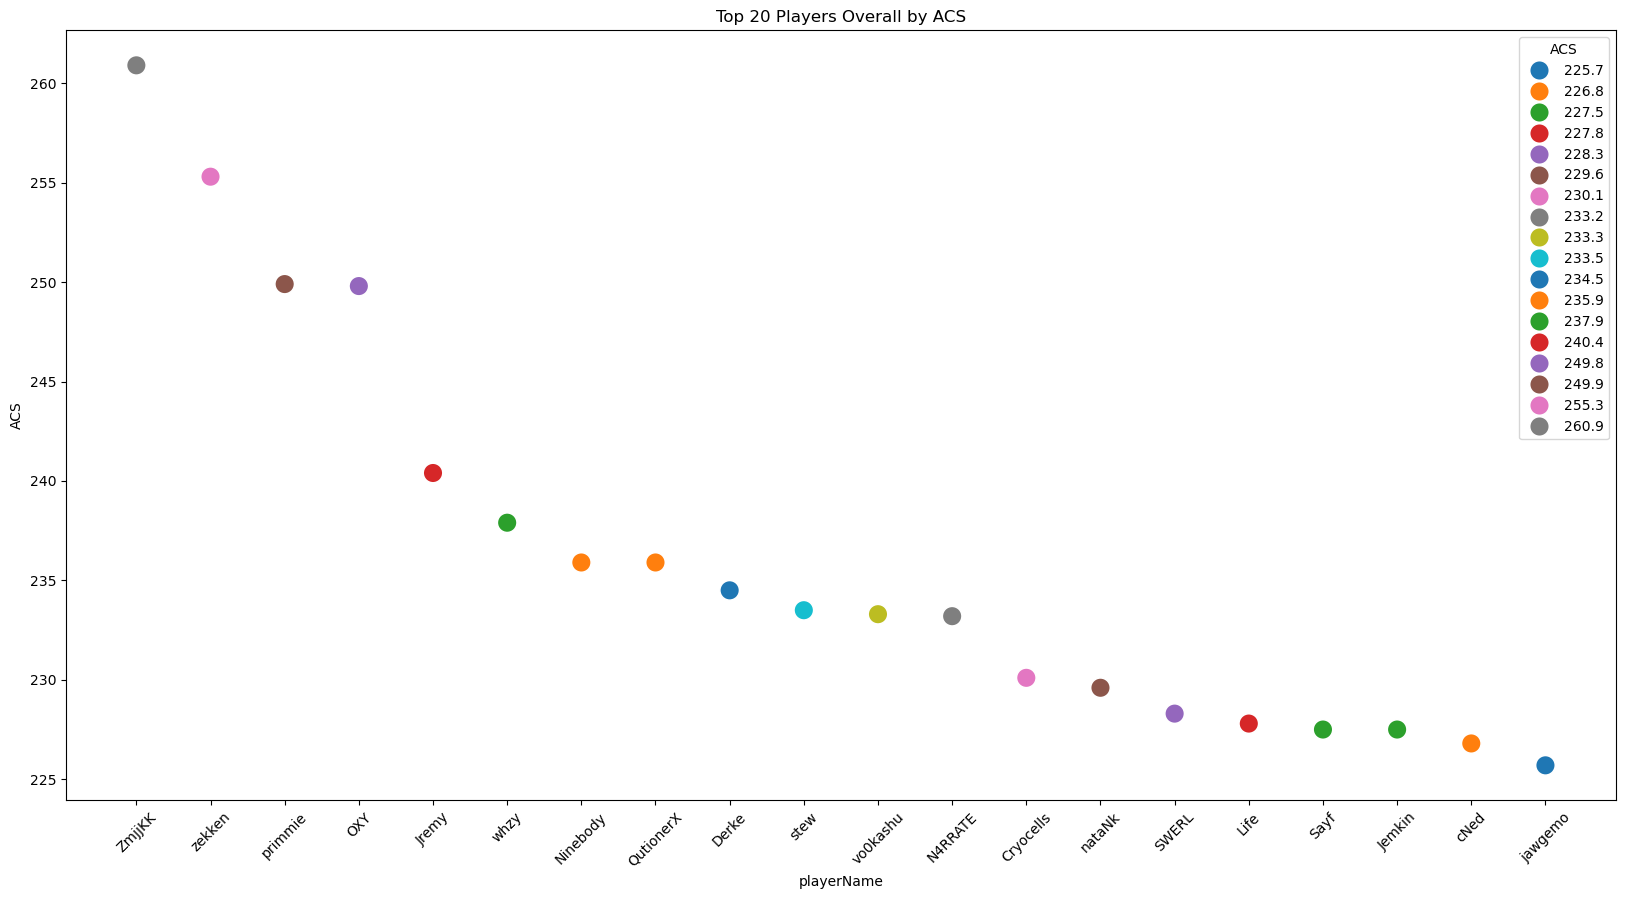

In [23]:
plt.figure(figsize=(20, 10))
sns.scatterplot(
    data=topplayer.head(20),  #This shows the top 20 players in each region, sorted by ACS
    x="playerName",
    y="ACS",
    hue="ACS", 
    palette="tab10",
    s=200
)
plt.title("Top 20 Players Overall by ACS")
plt.xticks(rotation=45)
plt.show()

Charting top 5 players in Each region

In [24]:
Regional_players = df.groupby(['region', 'playerName'], as_index=False)['ACS'].mean().reset_index()  #Groups the dataframe by region and playerName, then takes the mean of all columns for each group, .reset_index() turns the grouped index into a normal Dataframe again.
Regional_players['ACS'] = Regional_players['ACS'].round(1)  #Rounds the ACS column to 2 decimal places
top5perregion = Regional_players.sort_values(['region', 'ACS'], ascending=[True, False]).groupby('region').head(5)  #Sorts the dataframe by region and ACS, ascending for region and descending for ACS, then groups by region and takes the top 5 rows for each group
top5perregion.head(20)



,index,region,playerName,ACS
34,34,Americas,zekken,255.3
11,11,Americas,OXY,249.8
3,3,Americas,Cryocells,230.1
22,22,Americas,jawgemo,225.7
28,28,Americas,s0m,224.7
84,84,China,ZmjjKK,260.9
102,102,China,whzy,237.9
63,63,China,Ninebody,235.9
99,99,China,stew,233.5
101,101,China,vo0kashu,233.3


Scatterplot

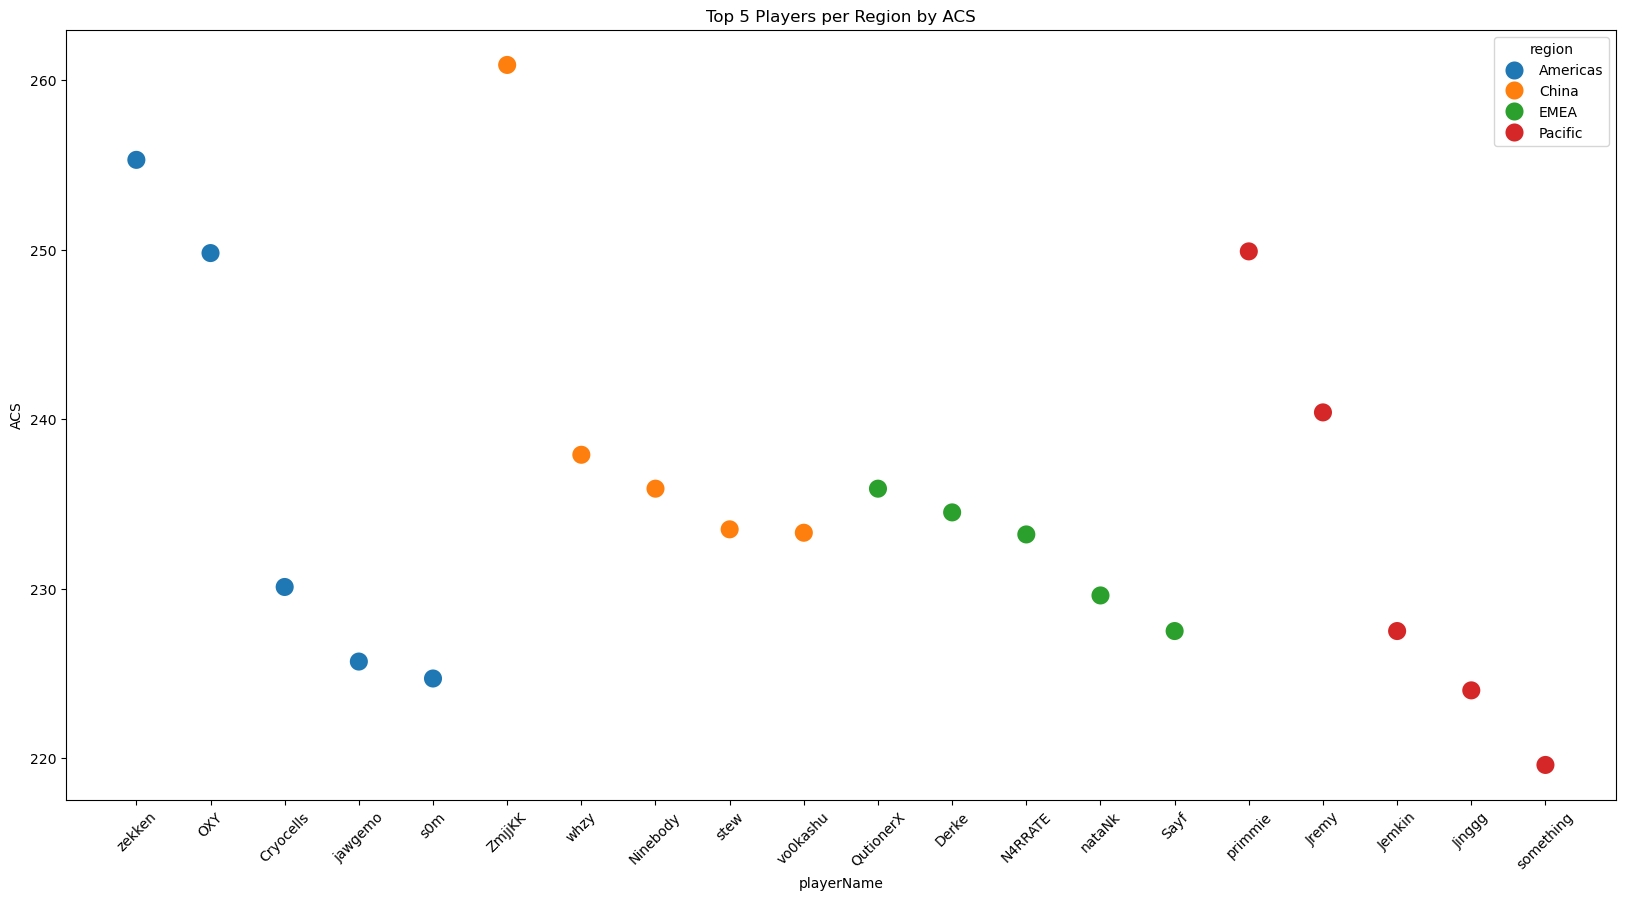

In [25]:
plt.figure(figsize=(20, 10))
sns.scatterplot(
    data=top5perregion,
    x="playerName",
    y="ACS",
    hue="region", 
    palette="tab10",
    s=200
)
plt.title("Top 5 Players per Region by ACS")
plt.xticks(rotation=45)
plt.show()